In [1]:
#Import depednecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from citipy import citipy
import requests
import json
import datetime

#Import API key
from config import weather_api_key

In [2]:
#Function for plotting
def scatterPlotting(dataFrame, x_axis, y_axis):
    date = datetime.datetime.now().strftime("%I:%M%p on %B %d, %Y")
    plt.scatter(dataFrame[x_axis], dataFrame[y_axis])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'City {x_axis} vs {y_axis} - {date}')
    plt.grid(axis="both")
    plt.xlim(-90, 90)
    plt.savefig(f'../output_data/{y_axis}_vs_{x_axis}.png')
    plt.show()

In [3]:
#Function for plotting linea regression
def linearRegressionPlotting(dataFrame, x_axis, y_axis, xfig, yfig, hemisphere):
    date = datetime.datetime.now().strftime("%I:%M%p on %B %d, %Y")
    x_values = dataFrame[x_axis]
    y_values = dataFrame[y_axis]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(xfig, yfig), xycoords='figure points', fontsize=15, color="red")
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'{hemisphere} - {y_axis} vs Latitude - Linear Regression - {date}')
    plt.savefig(f'../output_data/{hemisphere}_{y_axis}_vs_{x_axis}.png')
    plt.show()

In [4]:
#Output csv file
output_file = "../output_data/cities_Weather.csv"


In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [6]:
#Base url for open weather API
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#Lists for API responses
json_cities = []
json_countries = []
json_lats = []
json_longs = []
json_temps = []
json_clouds = []
json_humidity = []
json_wind = []

for city in cities:
    #Params for API requests
    params = {"q":city, "appid":weather_api_key, "units":"Imperial"}
    response = requests.get(base_url, params).json()
    if("name" in response and "id" in response):
        print(f'Processing... {response["name"]} | Id: {response["id"]}')
        json_cities.append(response["name"])
        json_countries.append(response["sys"]["country"])
        json_lats.append(response["coord"]["lat"])
        json_longs.append(response["coord"]["lon"])
        json_temps.append(response["main"]["temp"])
        json_humidity.append(response["main"]["humidity"])
        json_wind.append(response["wind"]["speed"])
        json_clouds.append(response["clouds"]["all"])
    else:
        print("City not found")

print(len(json_cities))

Processing... Cherskiy | Id: 2126199
Processing... Bengkulu | Id: 1649150
Processing... Ushuaia | Id: 3833367
Processing... Inírida | Id: 3671450
Processing... Qaanaaq | Id: 3831208
Processing... Rapu-Rapu | Id: 1691862
Processing... Puerto Ayora | Id: 3652764
Processing... Kapaa | Id: 5848280
Processing... Severo-Kuril'sk | Id: 2121385
Processing... Cape Town | Id: 3369157
Processing... Busselton | Id: 2075265
Processing... Emerald | Id: 2167426
Processing... Banes | Id: 3567869
Processing... Veseloyarsk | Id: 1487164
Processing... Geraldton | Id: 2070998
Processing... Okha | Id: 2122614
Processing... Atuona | Id: 4020109
Processing... Port Elizabeth | Id: 964420
City not found
Processing... Arraial do Cabo | Id: 3471451
Processing... Tiznit Province | Id: 2527087
Processing... Ancud | Id: 3899695
Processing... Praia | Id: 3374333
Processing... Bredasdorp | Id: 1015776
Processing... Galway | Id: 2964180
Processing... Tuatapere | Id: 2180815
Processing... Pargas | Id: 642673
Processing

Processing... Porto-Novo | Id: 2392087
Processing... Bataiporã | Id: 3470338
Processing... Esperance | Id: 2071860
Processing... Avera | Id: 4231997
Processing... Roald | Id: 3141667
Processing... Port Moresby | Id: 2088122
Processing... Huilong | Id: 1806840
Processing... Turukhansk | Id: 1488903
Processing... Raudeberg | Id: 3146487
City not found
Processing... Karratha | Id: 6620339
Processing... Kavaratti | Id: 1267390
Processing... Touho | Id: 2137873
Processing... Wencheng | Id: 1791539
Processing... Dandong | Id: 2037886
Processing... Honolulu | Id: 5856195
Processing... Barra do Garças | Id: 3470709
Processing... Aksu | Id: 1529660
Processing... Panjāb | Id: 1131162
Processing... High Prairie | Id: 5975034
Processing... Caravelas | Id: 3466980
Processing... Owando | Id: 2255542
Processing... Mayumba | Id: 2399001
Processing... Gävle | Id: 2712414
Processing... Les Escoumins | Id: 6944110
Processing... Palmer | Id: 4946620
Processing... Vágur | Id: 2610806
Processing... Tilichik

Processing... North Myrtle Beach | Id: 4589446
Processing... Santa Isabel | Id: 3450188
City not found
Processing... Bonthe | Id: 2409914
Processing... Coolum Beach | Id: 2170581
Processing... Kempele | Id: 653252
Processing... Oddur | Id: 49747
City not found
Processing... Dwārka | Id: 1272140
Processing... Inhambane | Id: 1045114
Processing... Whitehorse | Id: 6180550
Processing... Vestmannaeyjar | Id: 3412093
Processing... Russell | Id: 4047434
Processing... Mandalgovi | Id: 2030065
Processing... Belém de São Francisco | Id: 3405852
Processing... Antofagasta | Id: 3899539
Processing... Liaqatabad | Id: 1172451
Processing... Toora-Khem | Id: 1489401
Processing... Varhaug | Id: 3132644
Processing... Xalapa | Id: 3526617
Processing... Konstantinovka | Id: 2021799
Processing... Arman' | Id: 2127060
Processing... Redlands | Id: 5386754
Processing... Laas | Id: 3175096
Processing... Atambua | Id: 1651103
Processing... Labuhan | Id: 8079926
Processing... Ferrol | Id: 3123493
Processing... 

In [8]:
#Create dataframe with responses data
weather_df = pd.DataFrame({"City": json_cities, "Country":json_countries, "Latitude":json_lats, "Longitude":json_longs,
                           "Temperature (F)":json_temps, "Humidity %":json_humidity, "Cloudiness %":json_clouds, 
                           "Wind Speed (mph)":json_wind})
weather_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph)
0,Cherskiy,RU,68.75,161.30,8.11,91,22,8.12
1,Bengkulu,ID,-3.80,102.27,84.51,65,100,3.06
2,Ushuaia,AR,-54.80,-68.30,46.40,75,75,4.32
3,Inírida,CO,3.87,-67.92,74.14,93,69,1.99
4,Qaanaaq,GL,77.48,-69.36,-5.01,84,99,3.29


In [9]:
#Export data to a csv file
weather_df.to_csv(output_file, index=False, header=True)

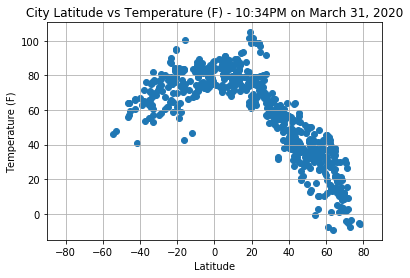

In [10]:
#Temperature (F) vs. Latitude scatter plot

scatterPlotting(weather_df, "Latitude", "Temperature (F)")

#Analizing temperature vs latitude show as that as latitude increases and is nearer to 90 the temperature is lower.

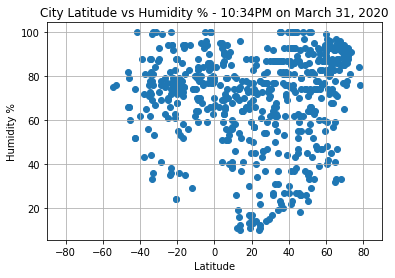

In [11]:
#Humidity % vs. Latitude scatter plot

scatterPlotting(weather_df, "Latitude", "Humidity %")

#Humidity vs latitude shows that cities from the sample that are between -40 and 70 latitude have more humidity percentage

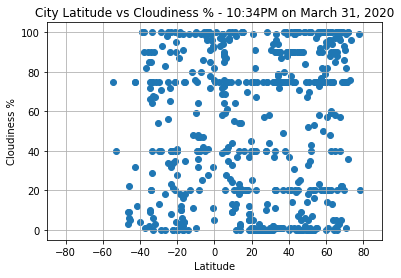

In [12]:
#Cloudiness % vs. Latitude scatter plot

scatterPlotting(weather_df, "Latitude", "Cloudiness %")

#Cloudiness vs latitude between -40 and 70 latitude, the cities with higher and lower temperatures got tmore cloudiness percentage

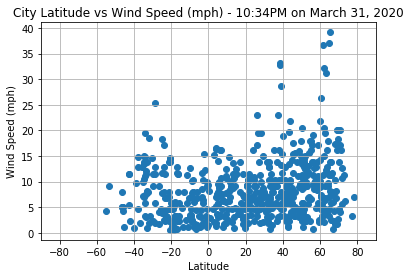

In [13]:
#Wind Speed mph vs. Latitude scatter plot

scatterPlotting(weather_df, "Latitude", "Wind Speed (mph)")

#Wind speed vs latitude shows the lower the temperature the higher the wind speed is.

In [14]:
#Northern Hemisphere dataframe
NH_weather_df = weather_df.loc[weather_df["Latitude"] >= 0]
NH_weather_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph)
0,Cherskiy,RU,68.75,161.30,8.11,91,22,8.12
3,Inírida,CO,3.87,-67.92,74.14,93,69,1.99
4,Qaanaaq,GL,77.48,-69.36,-5.01,84,99,3.29
5,Rapu-Rapu,PH,13.19,124.13,83.39,74,18,10.42
7,Kapaa,US,22.08,-159.32,74.70,73,20,11.41


In [15]:
#Southern Hemisphere dataframe
SH_weather_df = weather_df.loc[weather_df["Latitude"] < 0]
SH_weather_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph)
1,Bengkulu,ID,-3.80,102.27,84.51,65,100,3.06
2,Ushuaia,AR,-54.80,-68.30,46.40,75,75,4.32
6,Puerto Ayora,EC,-0.74,-90.35,77.00,80,32,3.04
9,Cape Town,ZA,-33.93,18.42,61.95,72,20,19.46
10,Busselton,AU,-33.65,115.33,75.54,33,100,7.56


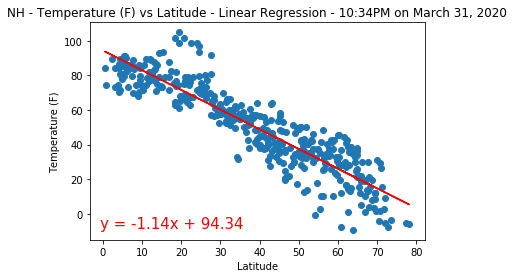

In [16]:
#Northern Hemisphere - Temperature (F) vs. Latitude
linearRegressionPlotting(NH_weather_df, "Latitude", "Temperature (F)", 100, 50, "NH")

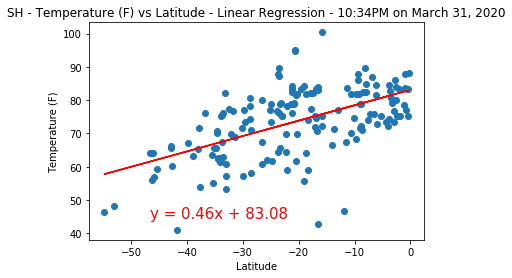

In [24]:
#Southern Hemisphere - Temperature (F) vs. Latitude
linearRegressionPlotting(SH_weather_df, "Latitude", "Temperature (F)", 150, 60, "SH")

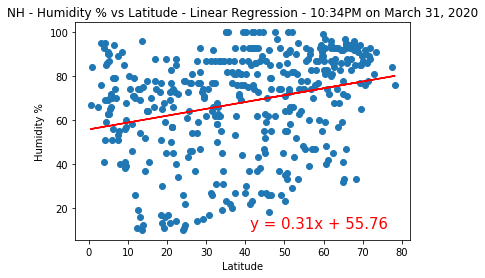

In [26]:
#Northern Hemisphere - Humidity vs. Latitude
linearRegressionPlotting(NH_weather_df, "Latitude", "Humidity %", 250, 50, "NH")

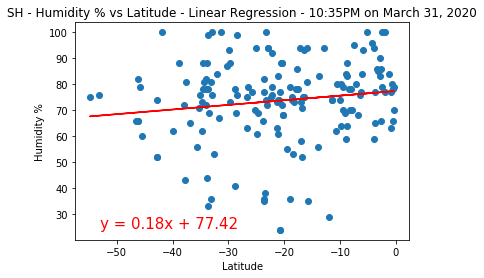

In [27]:
#Southern Hemisphere - Humidity vs. Latitude
linearRegressionPlotting(SH_weather_df, "Latitude", "Humidity %", 100, 50, "SH")

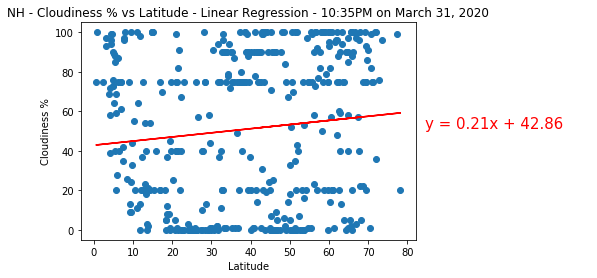

In [28]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
linearRegressionPlotting(NH_weather_df, "Latitude", "Cloudiness %", 425, 150, "NH")

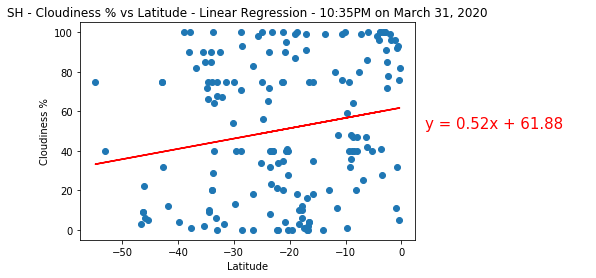

In [29]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
linearRegressionPlotting(SH_weather_df, "Latitude", "Cloudiness %", 425, 150, "SH")

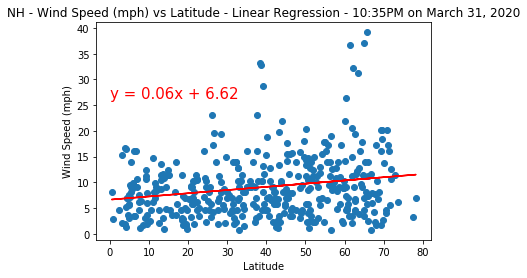

In [30]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
linearRegressionPlotting(NH_weather_df, "Latitude", "Wind Speed (mph)", 110, 180, "NH")

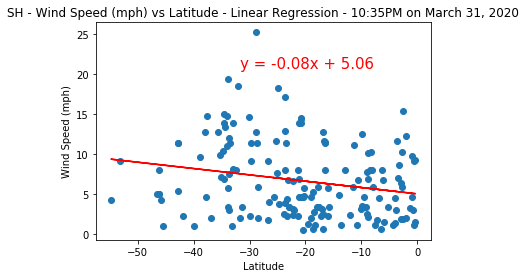

In [31]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
linearRegressionPlotting(SH_weather_df, "Latitude", "Wind Speed (mph)", 240, 210, "SH")